# Задание по МФК "Математическая статистика и анализ данных"

Выполнила: Учар Айгуль Хулусиевна   

## Задание 1

Вопрос исследования:
Какие 10 аэропортов наиболее популярны для вылетов из Нью-Йорка, и какова вероятность задержки прибытия рейсов в каждый из них?

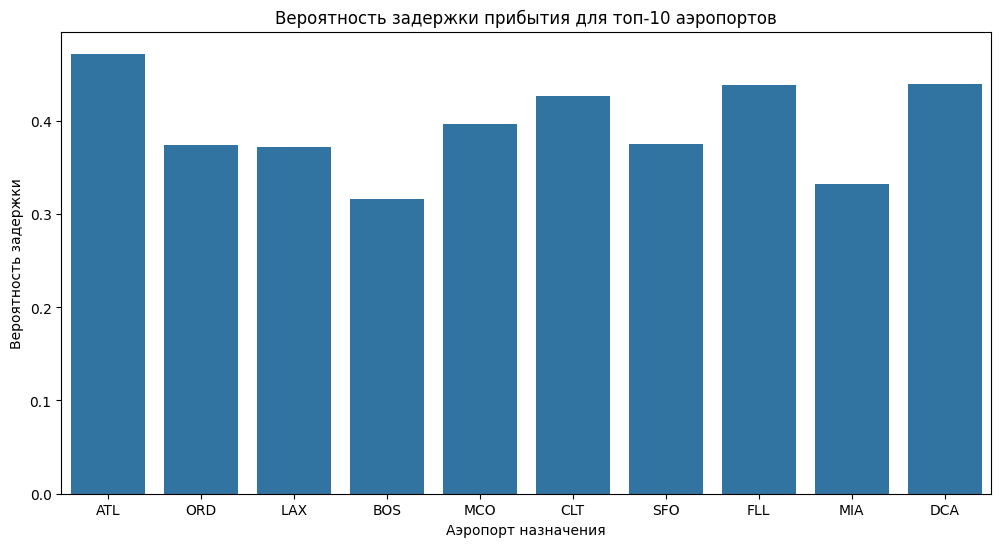

Наибольшая вероятность: ATL, Наименьшая: BOS


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flights_NY.csv').dropna()

# Топ-10 аэропортов по количеству рейсов
top_dest = df['dest'].value_counts().head(10).index.tolist()
top_flights = df[df['dest'].isin(top_dest)]

# Расчет вероятности задержки
prob_delay = top_flights.groupby('dest')['arr_delay'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False)
prob_delay = prob_delay.reindex(top_dest)

plt.figure(figsize=(12, 6))
sns.barplot(x=prob_delay.index, y=prob_delay.values)
plt.title('Вероятность задержки прибытия для топ-10 аэропортов')
plt.xlabel('Аэропорт назначения')
plt.ylabel('Вероятность задержки')
plt.show()

max_airport = prob_delay.idxmax()
min_airport = prob_delay.idxmin()
print(f'Наибольшая вероятность: {max_airport}, Наименьшая: {min_airport}')

Для каждого аэропорта назначения (dest) подсчитано общее количество рейсов.

Отобраны 10 аэропортов с наибольшим числом рейсов.

Произведен расчет вероятности задержки: для каждого аэропорта вычислена доля рейсов, у которых задержка прибытия (arr_delay) больше 0:  

$ P(задержка)= \frac{Количество \ рейсов \ с \ arr\_delay > 0}{Общее \ количество \ рейсов \ с \ arr\_delay > 0​ } $  

 **Выводы:** ATL (Атланта) — крупнейший аэропорт с высокой загруженностью, что увеличивает риск задержек из-за перегруженности.  
 При этом в целом корреляция между количеством рейсов и вероятностью задержки слабая. На результат влияет комплекс факторов, включая географию, инфраструктуру и внешние условия.

## Задание 2  


Вопрос исследования:
Как распределено время перелетов из Нью-Йорка в Сан-Франциско (SFO)? Соответствует ли это распределение нормальному закону, и в каких пределах с вероятностью 95% лежит время полета?

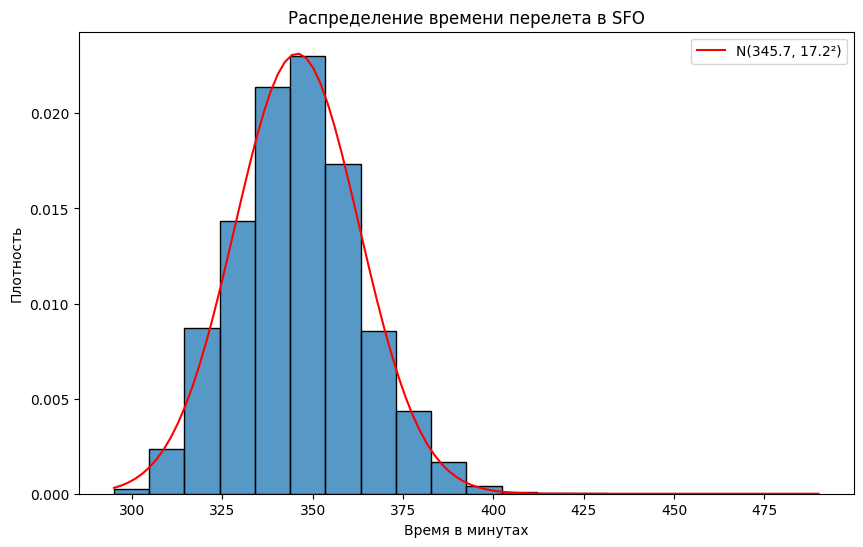

95% интервал: [311.9, 379.5] минут


In [15]:
from scipy.stats import norm
import numpy as np

sfo_flights = [df['dest'] == 'SFO']

# Параметры нормального распределения
mu, sigma = norm.fit(air_time)
x = np.linspace(air_time.min(), air_time.max(), 100)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
sns.histplot(air_time, kde=False, stat='density', bins=20)
plt.plot(x, pdf, 'r-', label=f'N({mu:.1f}, {sigma:.1f}²)')
plt.title('Распределение времени перелета в SFO')
plt.xlabel('Время в минутах')
plt.ylabel('Плотность')
plt.legend()
plt.show()

ci_low = mu - 1.96 * sigma
ci_high = mu + 1.96 * sigma
print(f'95% интервал: [{ci_low:.1f}, {ci_high:.1f}] минут')

Подсчет параметров нормального распределения производится следующим образом:

*   Среднее (μ): air_time.mean().
*   Стандартное отклонение (σ): air_time.std().

Для наложения плотности нормального распределения на гистограмму  использована функция scipy.stats.norm.pdf() с найденными μ и σ.

Расчет 95% доверительного интервала для нормального распределения производился по формуле $ [μ−1.96⋅σ,μ+1.96⋅σ] $

**Выводы:** Эмпирическое распределение близко к нормальному, что подтверждается визуальным совпадением гистограммы и теоретической кривой.

С вероятностью 95% время полета из Нью-Йорка в SFO лежит в пределах [311.9, 379.5] минут.

## Задание 3

Вопрос исследования: Какие часы являются пиковыми для вылетов из аэропорта JFK (до и после полудня)? Как связаны пиковые часы со средней задержкой вылетов, и является ли различие в задержках статистически значимым?

In [17]:
from scipy.stats import ttest_ind

jfk_flights = df[df['origin'] == 'JFK'].copy()
jfk_flights['hour'] = jfk_flights['dep_time'] // 100

hourly_counts = jfk_flights['hour'].value_counts().sort_index()

# Поиск пиков
peak_am = hourly_counts[hourly_counts.index < 12].idxmax()
peak_pm = hourly_counts[hourly_counts.index >= 12].idxmax()

delay_am = jfk_flights[jfk_flights['hour'] == peak_am]['dep_delay'].mean()
delay_pm = jfk_flights[jfk_flights['hour'] == peak_pm]['dep_delay'].mean()

# Проверка значимости
t_stat, p_val = ttest_ind(
    jfk_flights[jfk_flights['hour'] == peak_am]['dep_delay'].dropna(),
    jfk_flights[jfk_flights['hour'] == peak_pm]['dep_delay'].dropna()
)

print(f'Пиковые часы: {peak_am} AM и {peak_pm} PM')
print(f'Средние задержки: AM={delay_am:.1f}, PM={delay_pm:.1f}')
print(f'p-значение: {p_val}')

Пиковые часы: 8.0 AM и 16.0 PM
Средние задержки: AM=1.0, PM=10.9
p-значение: 2.883608900905687e-175


Средние задержки больше в вечерние часы.   
p-значение равно 2.883608900905687e-175, что является очень маленьким числом, стремящимся к 0. Следовательно гипотеза о равенстве средних задержек отвергается.
Различие между 8:00 и 16:00 статистически значимо на любом разумном уровне значимости (например, α=0.05).  
**Выводы:** Вечерние рейсы задерживаются значимо чаще. Это логично, ведь происходит накопление задержек в течение дня и в целом аэропорт бывает более перегружен в вечернее время.

## Задание 4

Вопрос исследования:
Как стандартное отклонение времени перелета связано с расстоянием до аэропорта назначения? Можно ли улучшить прогноз этой зависимости, используя дополнительные признаки на основе расстояния?

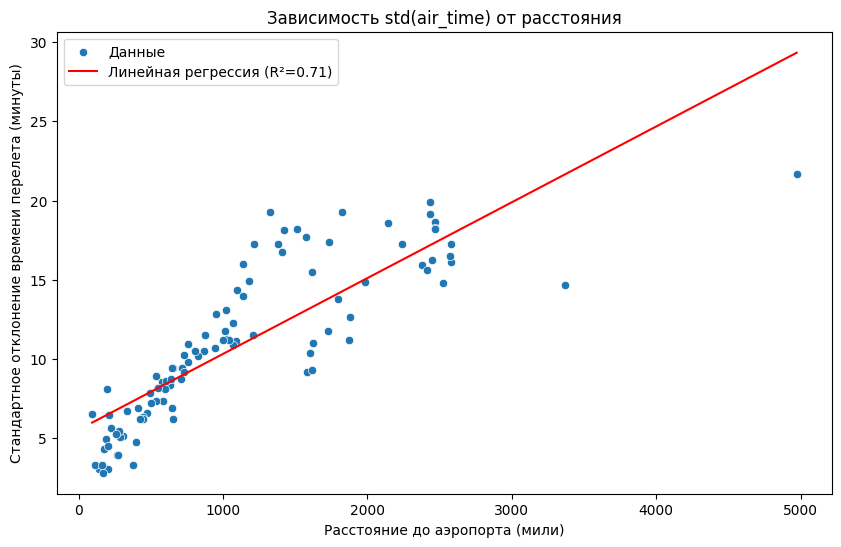

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

airport_stats = df.groupby('dest').agg(
    std_air_time=('air_time', 'std'),
    mean_distance=('distance', 'mean')
).reset_index().dropna()

X = airport_stats[['mean_distance']]
y = airport_stats['std_air_time']

# Линейная регрессия
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
r2_lr = r2_score(y, y_pred_lr)

# График
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_distance', y='std_air_time', data=airport_stats, label='Данные')
sns.lineplot(x=X['mean_distance'], y=y_pred_lr, color='red', label=f'Линейная регрессия (R²={r2_lr:.2f})')
plt.xlabel('Расстояние до аэропорта (мили)')
plt.ylabel('Стандартное отклонение времени перелета (минуты)')
plt.title('Зависимость std(air_time) от расстояния')
plt.legend()
plt.show()

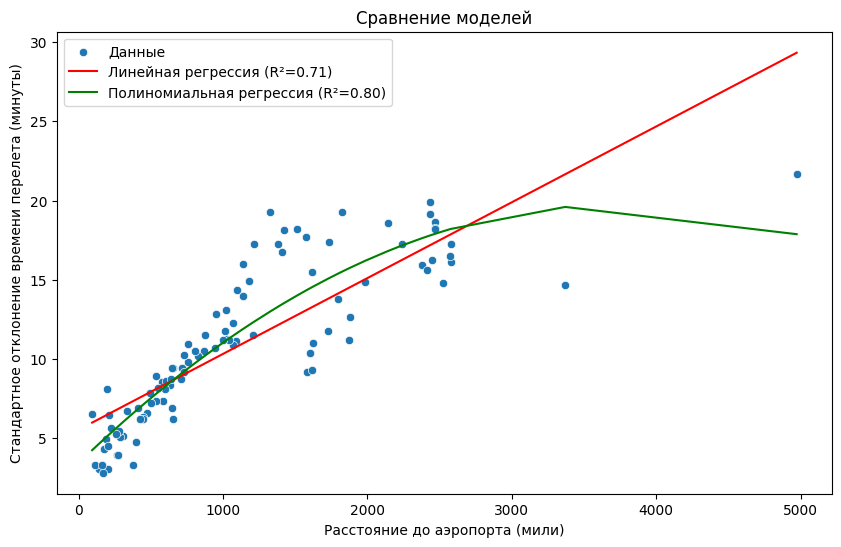

In [20]:
# Добавление квадрата расстояния
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)
y_pred_poly = lr_poly.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_distance', y='std_air_time', data=airport_stats, label='Данные')
sns.lineplot(x=X['mean_distance'], y=y_pred_lr, color='red', label=f'Линейная регрессия (R²={r2_lr:.2f})')
sns.lineplot(x=X['mean_distance'], y=y_pred_poly, color='green', label=f'Полиномиальная регрессия (R²={r2_poly:.2f})')
plt.xlabel('Расстояние до аэропорта (мили)')
plt.ylabel('Стандартное отклонение времени перелета (минуты)')
plt.title('Сравнение моделей')
plt.legend()
plt.show()

**Выводы:** Модель с новым входным признаком значительно улучшила точность (+9%), что подтверждает наличие нелинейной зависимости между расстоянием и стандартным отклонением времени перелета. Кривая на графике отражает более сложную связь, которую не может уловить линейная модель

## Задание 5


Вопрос исследования: Методом кластерного анализа выделить три группы авиакомпаний на основе пары признаков: средняя задержка прилета и средняя задержка вылета. Построить точечную диаграмму на этих признаках и раскрасьте точки в соответствии с номером кластера.



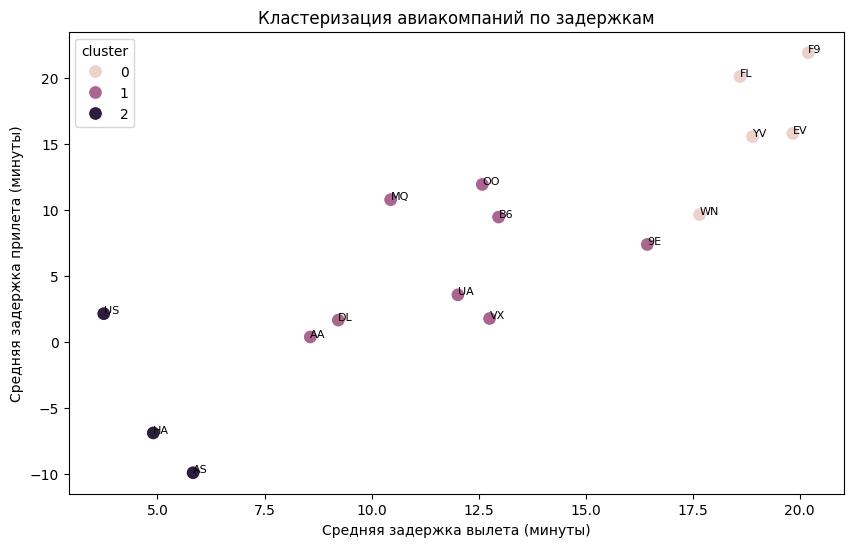

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

carrier_stats = df.groupby('carrier').agg(
    mean_arr_delay=('arr_delay', 'mean'),
    mean_dep_delay=('dep_delay', 'mean')
).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(carrier_stats[['mean_arr_delay', 'mean_dep_delay']])

# Кластеризация методом k средних
kmeans = KMeans(n_clusters=3, random_state=42)
carrier_stats['cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='mean_dep_delay',
    y='mean_arr_delay',
    hue='cluster',
    data=carrier_stats,
    s=100
)

for line in range(carrier_stats.shape[0]):
    plt.text(
        carrier_stats.mean_dep_delay[line],
        carrier_stats.mean_arr_delay[line],
        carrier_stats.carrier[line],
        fontsize=8
    )

plt.xlabel('Средняя задержка вылета (минуты)')
plt.ylabel('Средняя задержка прилета (минуты)')
plt.title('Кластеризация авиакомпаний по задержкам')
plt.show()

**Интерпретация результатов:**

Авиалинии с малой задержкой рейсов: HA (Hawaiian Airlines) и AS (Alaska Airlines) летают из непопулярных направлений, аэропорты Гаваи и Аляски не сильно перегружены. US (US Airways) может иметь хорошую организацию расписания или фокус на определённых направлениях с низким трафиком.  

Авиалинии со средней задержкой рейсов: Это крупные авиакомпании с большим количеством рейсов, возможно, сталкиваются с накоплением задержек из-за масштаба работы.  

Авиалинии с большой задержкой рейсов: Бюджетные авиакомпании, такие как Frontier, могут экономить на обслуживании и иметь более плотное расписание, минимизируя простои, что увеличивает риск накопления задержек.  

**Выводы:** Низкие задержки достигаются за счет узкой специализации, высокие — становятся платой за доступность и низкие цены.